# Python Basics Weeks 6 & 7

Week 6 & 7 topics:
- Pandas

In [1]:
# Pandas is the main library we use to work with dataframes
import pandas as pd
# pd is the convention used to abbreviate pandas 
# the abbreviation comes from the pandas documentation

import os  # to call our current working directory

***Important***: Pandas documentation: https://pandas.pydata.org/docs/reference

Pandas takes time to learn, and even more time to learn how to use it *well*. What we're doing today will give you a taste of how Pandas operates. Remember, the best way to learn is through *intentional practice*!

A couple of things to note about the documentation:
- `df` is used as a generic name for a dataframe. When you see `df` in the documentation, replace it with the name of the dataframe you are using.
- A `series` is typically a column (technical note: "series" actually means "1-dimensional array"; this comes from `numpy`, which Pandas is based on)
- Calling an `index` calls a row within the dataframe
- There are two common ways to call out a column in a dataframe: `df.column_name` and `df["column_name"]`. You will see me use them interchangably.

## Getting our files ready

In [2]:
# The working directory is where we are within our computer's file structure
# e.g. when we export our cleaned data at the end of the session, where is it going to end up?

# Set working directory (not strictly necessary, but something we haven't done yet):
os.chdir(r"C:/Users/swatson/Documents/GitHub/python_basics")  # chdir means "change directory"

print(f'Current working directory : {os.getcwd()}')  # getcwd means "get current working directory"

Current working directory : C:\Users\swatson\Documents\GitHub\python_basics


In [3]:
# Set the file path as a variable (not strictly necessary, but a convenient convention)

path = r"C:\Users\swatson\Documents\GitHub\python_basics\pandas_week_6.xlsx"

In [4]:
print(path)

C:\Users\swatson\Documents\GitHub\python_basics\pandas_week_6.xlsx


In [5]:
# Mac or Linux users would use a file path with forward slashes:

mac_path = "/Users/sawatson/Documents/GitHub/Python Basics/pandas_week_6.xlsx"

In [6]:
# Why raw strings for windows users?

path = "C:\Users\swatson\Desktop\Python Practice\EDCI_353_SW_pandas_test.xlsx"
print(path)

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (2271234833.py, line 3)

In many computer languages, backslashes ` \ ` act as "escape characters" - they have specific functions and meanings.

Python thinks there is an escape character in the string (specifically, a unicode escape). Other common escapes are `\f`, `\n`, `\t`, `\r`, `\a`, `\b`... 

To avoid issues with escape characters, we can either use a double backslash or, more conveniently, a raw string.

In [7]:
# double backslash example:

path = "C:\\Users\\swatson\\Documents\\GitHub\\python_basics\\pandas_week_6.xlsx"
print(path)

C:\Users\swatson\Documents\GitHub\python_basics\pandas_week_6.xlsx


In [8]:
# I'm lazy, so I'm going to use a raw string.

path = r"C:\Users\swatson\Documents\GitHub\python_basics\pandas_week_6.xlsx"

## Getting Started with Pandas

In [9]:
# My Excel workbook has more than one sheet, so I should specify which sheet I want to be read in. 
# Read the in first excel sheet using pd.read_excel (or pd.read_csv for csv files)

df = pd.read_excel(path, 0)  # using the index number of the sheet instead of its name (because it's shorter)

## Let's look at the data

In [10]:
# Preview the data by typing the name of your dataframe
# This works if you're in a Jupyter notebook (.ipynb)
# If you use another IDE, there are other ways to view dataframes
# e.g. in Spyder, double click on the name of the dataframe in the variables pane

df

,RecordedDate,Q2_1,Q2_2,Q2_3,Q2_4,Q3,Q3_5_TEXT,Q6,Q7,Q11,Q14
0,Recorded Date,Please provide the following information: - St...,Please provide the following information: - Name,Please provide the following information: - Age,Please provide the following information: - Ci...,What degree program are you part of? - Selecte...,What degree program are you part of? - Other -...,What is your gender?,How many people live in your household?,How many children do you have?,How many credit hours are you taking this seme...
1,"{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""QID2_1""}","{""ImportId"":""QID2_2""}","{""ImportId"":""QID2_3""}","{""ImportId"":""QID2_4""}","{""ImportId"":""QID8""}","{""ImportId"":""QID8_5_TEXT""}","{""ImportId"":""QID6""}","{""ImportId"":""QID11_TEXT""}","{""ImportId"":""QID3_TEXT""}","{""ImportId"":""QID14_TEXT""}"
2,2023-10-12 10:54:00,111467,Ann,25,"Oxford, MS",EdD,NaN,Female,4,2,9
3,2023-10-12 10:56:00,163728,Bob,30,"Batesville, MS",MA,NaN,Male,1,0,9
4,2023-10-12 10:59:00,157832,Carrie,55,"Pontotoc, MS",MA,NaN,Prefer not to say,6,4 children,9
5,2023-10-12 11:00:00,164722,Dani,NaN,"Chicago, IL",PhD,NaN,Non-binary / third gender,3,0,6
6,2023-10-12 11:05:00,174883,Earl,24,"Birmingham, AL",MS,NaN,Male,5,1,9 hours
7,2023-10-12 11:07:00,168483,Fran,26,"Oxford, MS",Other,EdS,Female,2,0,9
8,2023-10-12 11:08:00,657392,Gene,62,"Oxford, Mississippi",MA,NaN,Male,3,1,6
9,2023-10-12 11:10:00,164783,Hasim,24,"Oxford, MS",EdD,NaN,Male,4,2,3


## Header Headaches

In [11]:
# Multiple header rows are an issue
# There are several ways to handle this
# By default the first row (index 0) is read in as the header. Let's say that I want row 2 to be my header.

df = pd.read_excel(path, 0, header=1) # I pass the index number of the row into the header argument
df.head()

# Notice that the row above my new header (row 1, index 0) has been automatically dropped.

,Recorded Date,Please provide the following information: - Student ID,Please provide the following information: - Name,Please provide the following information: - Age,Please provide the following information: - City & State,What degree program are you part of? - Selected Choice,What degree program are you part of? - Other - Text,What is your gender?,How many people live in your household?,How many children do you have?,How many credit hours are you taking this semester?
0,"{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""QID2_1""}","{""ImportId"":""QID2_2""}","{""ImportId"":""QID2_3""}","{""ImportId"":""QID2_4""}","{""ImportId"":""QID8""}","{""ImportId"":""QID8_5_TEXT""}","{""ImportId"":""QID6""}","{""ImportId"":""QID11_TEXT""}","{""ImportId"":""QID3_TEXT""}","{""ImportId"":""QID14_TEXT""}"
1,2023-10-12 10:54:00,111467,Ann,25,"Oxford, MS",EdD,NaN,Female,4,2,9
2,2023-10-12 10:56:00,163728,Bob,30,"Batesville, MS",MA,NaN,Male,1,0,9
3,2023-10-12 10:59:00,157832,Carrie,55,"Pontotoc, MS",MA,NaN,Prefer not to say,6,4 children,9
4,2023-10-12 11:00:00,164722,Dani,NaN,"Chicago, IL",PhD,NaN,Non-binary / third gender,3,0,6


### The easiest way to do this:

In [12]:
# I could have also done this when I read in the Excel file using the names argument
# This is the shortest, easiest, and my most preferred way to do this.

df_renamed = pd.read_excel(path, 0, skiprows = [0,1], names=['date', 
                                                            'student_id', 
                                                            'name', 
                                                            'age',
                                                            'city_state',
                                                            'program',
                                                            'program_other',
                                                            'gender',
                                                            'household_size',
                                                            'num_children',
                                                            'credit_hours'
                                                                 ])
df_renamed.head()

# Just make sure that your list of names is the same length as your number of columns, or you will get an error.
# Column names are assigned going left to right across the dataframe.

,date,student_id,name,age,city_state,program,program_other,gender,household_size,num_children,credit_hours
0,2023-10-12 10:54:00,111467,Ann,25.0,"Oxford, MS",EdD,NaN,Female,4,2,9
1,2023-10-12 10:56:00,163728,Bob,30.0,"Batesville, MS",MA,NaN,Male,1,0,9
2,2023-10-12 10:59:00,157832,Carrie,55.0,"Pontotoc, MS",MA,NaN,Prefer not to say,6,4 children,9
3,2023-10-12 11:00:00,164722,Dani,NaN,"Chicago, IL",PhD,NaN,Non-binary / third gender,3,0,6
4,2023-10-12 11:05:00,174883,Earl,24.0,"Birmingham, AL",MS,NaN,Male,5,1,9 hours


### Other ways to handle headers

In [13]:
# I can drop the remaining row (what was originally row 3) using the drop method.

df.drop(index=[0], inplace=True)
df.head()

,Recorded Date,Please provide the following information: - Student ID,Please provide the following information: - Name,Please provide the following information: - Age,Please provide the following information: - City & State,What degree program are you part of? - Selected Choice,What degree program are you part of? - Other - Text,What is your gender?,How many people live in your household?,How many children do you have?,How many credit hours are you taking this semester?
1,2023-10-12 10:54:00,111467,Ann,25,"Oxford, MS",EdD,NaN,Female,4,2,9
2,2023-10-12 10:56:00,163728,Bob,30,"Batesville, MS",MA,NaN,Male,1,0,9
3,2023-10-12 10:59:00,157832,Carrie,55,"Pontotoc, MS",MA,NaN,Prefer not to say,6,4 children,9
4,2023-10-12 11:00:00,164722,Dani,NaN,"Chicago, IL",PhD,NaN,Non-binary / third gender,3,0,6
5,2023-10-12 11:05:00,174883,Earl,24,"Birmingham, AL",MS,NaN,Male,5,1,9 hours


In [14]:
# I could have also dropped extra headers when reading in by using the skiprows argument

df_skipped = pd.read_excel(path, 0, skiprows = [0,2], index_col=1)  # skipping rows 1 and 3. I also used index_col to change the index to student ID number
df_skipped.head()

,Recorded Date,Please provide the following information: - Name,Please provide the following information: - Age,Please provide the following information: - City & State,What degree program are you part of? - Selected Choice,What degree program are you part of? - Other - Text,What is your gender?,How many people live in your household?,How many children do you have?,How many credit hours are you taking this semester?
Please provide the following information: - Student ID,,,,,,,,,,
111467,2023-10-12 10:54:00,Ann,25.0,"Oxford, MS",EdD,NaN,Female,4,2,9
163728,2023-10-12 10:56:00,Bob,30.0,"Batesville, MS",MA,NaN,Male,1,0,9
157832,2023-10-12 10:59:00,Carrie,55.0,"Pontotoc, MS",MA,NaN,Prefer not to say,6,4 children,9
164722,2023-10-12 11:00:00,Dani,NaN,"Chicago, IL",PhD,NaN,Non-binary / third gender,3,0,6
174883,2023-10-12 11:05:00,Earl,24.0,"Birmingham, AL",MS,NaN,Male,5,1,9 hours


In [15]:
# The column names are long and cumbersome. You can rename them using the rename method. This can get tedious; see above for an easier way.

df.rename(columns={'Please provide the following information: - Student ID' : 'student_id',
                   'Recorded Date' : 'date',
                   'Please provide the following information: - Name' : 'name',
                   'Please provide the following information: - Age':'age',
                   'Please provide the following information: - City & State':'city_state',
                   'What degree program are you part of? - Selected Choice':'program1',
                   'What degree program are you part of? - Other - Text':'program_text',
                   'What is your gender?':'gender',
                   'How many people live in your household?':'household_size',
                   'How many credit hours are you taking this semester?':'credit_hours'}, 
          inplace=True) 

# inplace = True will overwrite the original dataframe. If you don't pass this argument, pandas creates a copy of your dataframe.
# You can use inplace = False (the default value), but will need to reassign the object in order to see the changes.
# If you don't use inplace = True OR don't reassign the object, when you run the code it will look like nothing has happened...

# preview the data with the new headers.
df.head()

,date,student_id,name,age,city_state,program1,program_text,gender,household_size,How many children do you have?,credit_hours
1,2023-10-12 10:54:00,111467,Ann,25,"Oxford, MS",EdD,NaN,Female,4,2,9
2,2023-10-12 10:56:00,163728,Bob,30,"Batesville, MS",MA,NaN,Male,1,0,9
3,2023-10-12 10:59:00,157832,Carrie,55,"Pontotoc, MS",MA,NaN,Prefer not to say,6,4 children,9
4,2023-10-12 11:00:00,164722,Dani,NaN,"Chicago, IL",PhD,NaN,Non-binary / third gender,3,0,6
5,2023-10-12 11:05:00,174883,Earl,24,"Birmingham, AL",MS,NaN,Male,5,1,9 hours


## Let's look at the data again

In [16]:
# Let's get some information about each variable in our dataframe. Use the .info() method to do this.

df_renamed.info()

# The .info() method returns the column index, name, a count of non-null observations, and the datatype of each variable.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            26 non-null     datetime64[ns]
 1   student_id      26 non-null     int64         
 2   name            26 non-null     object        
 3   age             24 non-null     float64       
 4   city_state      26 non-null     object        
 5   program         26 non-null     object        
 6   program_other   1 non-null      object        
 7   gender          26 non-null     object        
 8   household_size  26 non-null     int64         
 9   num_children    26 non-null     object        
 10  credit_hours    26 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 2.4+ KB


### A little bit of exploratory data analysis...

In [17]:
# Get some more information about the dataframe using .describe()

df_renamed.describe()

,student_id,age,household_size
count,26.000000,24.000000,26.000000
mean,179492.884615,30.458333,3.038462
std,99135.142880,10.802492,1.731607
min,111467.000000,21.000000,1.000000
25%,150369.500000,24.000000,2.000000
50%,164755.500000,26.000000,3.000000
75%,174863.000000,31.500000,4.000000
max,657392.000000,62.000000,7.000000


Notice that `describe()` only returns summary statistics on numerical variables. The `count` for age is two less than the counts for the other variables; this suggests we may have some missing information in that column. Also notice that it thinks student_id is a numerical variable!

In [19]:
# generate summary statistics for a single column:
# df.column_name.describe()

df_renamed.age.describe()

count    24.000000
mean     30.458333
std      10.802492
min      21.000000
25%      24.000000
50%      26.000000
75%      31.500000
max      62.000000
Name: age, dtype: float64

In [20]:
# use .query() to filter observations
# note the string inside the query
df_renamed.query("age > 30")

,date,student_id,name,age,city_state,program,program_other,gender,household_size,num_children,credit_hours
2,2023-10-12 10:59:00,157832,Carrie,55.0,"Pontotoc, MS",MA,NaN,Prefer not to say,6,4 children,9
6,2023-10-12 11:08:00,657392,Gene,62.0,"Oxford, Mississippi",MA,NaN,Male,3,1,6
9,2023-10-12 11:12:00,174803,Jon,33.0,"Unionville, MS",PhD,NaN,Male,3,0,9
10,2023-10-12 11:13:00,126489,Karrie,42.0,"batesville, mississippi",MS,NaN,Female,5,4,9
14,2023-10-12 11:19:00,154682,Mavis,47.0,"Memphis, TN",MA,NaN,Female,7,5,3 (dissertation hours)
18,2023-10-12 11:29:00,186473,Susan,38.0,"Memphis, TN",EdD,NaN,Female,2,1,6
25,2023-10-12 11:38:00,174893,Val,31.0,"Portland, Oregon",PhD,NaN,Male,4,0,6


<Axes: ylabel='Frequency'>

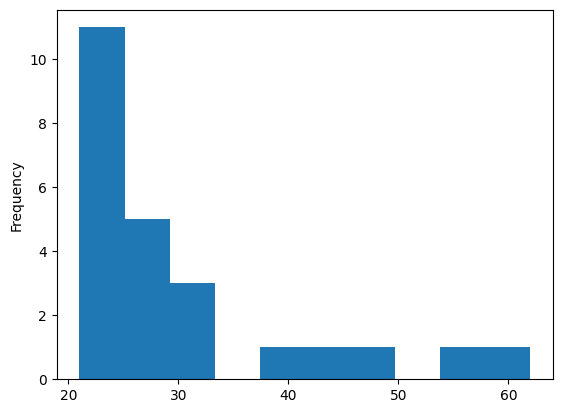

In [21]:
# make simple plots with the .plot function (make better plots using another package like matplotlib or Seaborn)
df_renamed.age.plot.hist()

In [22]:
df_renamed.credit_hours.plot.hist()
# Why doesn't this work? What does the error tell you?
# Look at what the info table has to say about the credit_hours column

TypeError: no numeric data to plot

In [23]:
# groupby lets you collapse categories. It can be chained with other functions
# see "Summarize Data" on the back of the Pandas cheatsheet

df_renamed.groupby(by = "program").median(numeric_only = True)

,student_id,age,household_size
program,,,
EdD,156338.0,26.5,4.0
MA,164228.0,47.0,4.5
MS,169887.5,24.5,3.0
Other,168483.0,26.0,2.0
PhD,164722.0,25.5,3.0


### Converting a variable to a new datatype

In [24]:
# Let's change student_id to a string using the .astype() method.
df_renamed['student_id'] = df_renamed['student_id'].astype(str)

# Now let's check the variable datatypes
df_renamed.dtypes

date              datetime64[ns]
student_id                object
name                      object
age                      float64
city_state                object
program                   object
program_other             object
gender                    object
household_size             int64
num_children              object
credit_hours              object
dtype: object

## Fixing issues with observations

When we look at our data, we're seeing issues with age, city_state, num_children and program_hours. We're also seeing a lot of blank cells in program_other.

In [25]:
# Let's start with age. When we called info, we saw that there are two observations missing - there should be 26, but there are only 24.
df_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            26 non-null     datetime64[ns]
 1   student_id      26 non-null     object        
 2   name            26 non-null     object        
 3   age             24 non-null     float64       
 4   city_state      26 non-null     object        
 5   program         26 non-null     object        
 6   program_other   1 non-null      object        
 7   gender          26 non-null     object        
 8   household_size  26 non-null     int64         
 9   num_children    26 non-null     object        
 10  credit_hours    26 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 2.4+ KB


Depending on the nature of your data, you might choose to leave missing values, drop the row, or replace the values. Leaving missing values in might be the appropriate choice in many cases, but it can also cause issues as your process your data further. Always be aware of what your data looks like and how you are transforming it!

To drop the rows, you can identify rows by hand or automate the process:

### Dealing with Missing Data

In [26]:
# by hand
df_renamed.isna() # view the dataframe with boolean values showing which observations are missing (True = missing)

,date,student_id,name,age,city_state,program,program_other,gender,household_size,num_children,credit_hours
0,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,True,False,False,True,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,True,False,False,False,False
7,False,False,False,False,False,False,True,False,False,False,False
8,False,False,False,False,False,False,True,False,False,False,False
9,False,False,False,False,False,False,True,False,False,False,False


In [27]:
# What we did above is hard to read. Let's get more specific.
# Show which columns contain missing data using the .any() method.

df_renamed.isna().any()

# Only age and program_other contain missing data (remember, True = missing) 

date              False
student_id        False
name              False
age                True
city_state        False
program           False
program_other      True
gender            False
household_size    False
num_children      False
credit_hours      False
dtype: bool

In [28]:
# This line of code will return a list of index numbers for rows that have missing values in the age column.
df_renamed[df_renamed['age'].isna()].index.tolist()

[3, 23]

In [29]:
# Now that I know the index numbers for the missing ages, I can drop those rows.
df_age_drop = df_renamed.drop(index=[3,23])
df_age_drop.head()

,date,student_id,name,age,city_state,program,program_other,gender,household_size,num_children,credit_hours
0,2023-10-12 10:54:00,111467,Ann,25.0,"Oxford, MS",EdD,NaN,Female,4,2,9
1,2023-10-12 10:56:00,163728,Bob,30.0,"Batesville, MS",MA,NaN,Male,1,0,9
2,2023-10-12 10:59:00,157832,Carrie,55.0,"Pontotoc, MS",MA,NaN,Prefer not to say,6,4 children,9
4,2023-10-12 11:05:00,174883,Earl,24.0,"Birmingham, AL",MS,NaN,Male,5,1,9 hours
5,2023-10-12 11:07:00,168483,Fran,26.0,"Oxford, MS",Other,EdS,Female,2,0,9


#### Side note: dropna()

"But Shelby!" you say, "In the pandas documentation, there's a `.dropna()` method. Why can't we just use that?"

Let's find out:

In [30]:
df_dropped_na = df_renamed.dropna()
df_dropped_na

,date,student_id,name,age,city_state,program,program_other,gender,household_size,num_children,credit_hours
5,2023-10-12 11:07:00,168483,Fran,26.0,"Oxford, MS",Other,EdS,Female,2,0,9


So what happened? The `.dropna()` method drops ALL rows containing ANY variable with an NA. Since column `program_other` contains only one non-NA value, all 25 rows containing NA values in this column are dropped from the dataset leaving only Fran's data behind.

If we had already cleaned the data,`dropna` might be the method we want to use but in this case it drops too many rows out of our data. 

#### Dropping Missing Data

Let's go back to our original technique. With only 26 rows and 2 missing values, it's not too bad to do this by hand.

However, if I had 2600 rows and 200 missing values, this would get really tedious and the potential for errors when entering information by hand would increase dramatically.

Let's automate this proccess. I'm assuming that I'm only working on one variable (age) at a time.

In [31]:
drop_list = df_renamed[df_renamed.age.isnull()].index.tolist() # generate the list of indicies with missing ages. Assign it a variable name.

df_dropped = df_renamed.drop(index = drop_list) # pass that list of indicies into the drop method and assign to a new dataframe.

df_dropped # view the new dataframe

,date,student_id,name,age,city_state,program,program_other,gender,household_size,num_children,credit_hours
0,2023-10-12 10:54:00,111467,Ann,25.0,"Oxford, MS",EdD,NaN,Female,4,2,9
1,2023-10-12 10:56:00,163728,Bob,30.0,"Batesville, MS",MA,NaN,Male,1,0,9
2,2023-10-12 10:59:00,157832,Carrie,55.0,"Pontotoc, MS",MA,NaN,Prefer not to say,6,4 children,9
4,2023-10-12 11:05:00,174883,Earl,24.0,"Birmingham, AL",MS,NaN,Male,5,1,9 hours
5,2023-10-12 11:07:00,168483,Fran,26.0,"Oxford, MS",Other,EdS,Female,2,0,9
6,2023-10-12 11:08:00,657392,Gene,62.0,"Oxford, Mississippi",MA,NaN,Male,3,1,6
7,2023-10-12 11:10:00,164783,Hasim,24.0,"Oxford, MS",EdD,NaN,Male,4,2,3
8,2023-10-12 11:11:00,178503,Ingrid,25.0,"New York, NY",PhD,NaN,Female,1,0,9
9,2023-10-12 11:12:00,174803,Jon,33.0,"Unionville, MS",PhD,NaN,Male,3,0,9
10,2023-10-12 11:13:00,126489,Karrie,42.0,"batesville, mississippi",MS,NaN,Female,5,4,9


#### Replacing Missing Data

You can use `.fillna()` to automate the process of replacing missing values.

Using the same technique as above, I've already identified that indicies 3 and 23 have missing ages. 
I'm going to replace those missing values with the mean value for age. 

In [32]:
# calculate the mean value for the age variable:
mean_age = df_renamed.age.mean()

# use .fillna() to replace the missing values with our mean value
df_renamed.age = df_renamed.age.fillna(mean_age)
df_renamed

# if you were replacing a value that is not NA or NaN, you would use dataframe.replace rather than dataframe.fillna (check the pandas documentation for the syntax)

,date,student_id,name,age,city_state,program,program_other,gender,household_size,num_children,credit_hours
0,2023-10-12 10:54:00,111467,Ann,25.000000,"Oxford, MS",EdD,NaN,Female,4,2,9
1,2023-10-12 10:56:00,163728,Bob,30.000000,"Batesville, MS",MA,NaN,Male,1,0,9
2,2023-10-12 10:59:00,157832,Carrie,55.000000,"Pontotoc, MS",MA,NaN,Prefer not to say,6,4 children,9
3,2023-10-12 11:00:00,164722,Dani,30.458333,"Chicago, IL",PhD,NaN,Non-binary / third gender,3,0,6
4,2023-10-12 11:05:00,174883,Earl,24.000000,"Birmingham, AL",MS,NaN,Male,5,1,9 hours
5,2023-10-12 11:07:00,168483,Fran,26.000000,"Oxford, MS",Other,EdS,Female,2,0,9
6,2023-10-12 11:08:00,657392,Gene,62.000000,"Oxford, Mississippi",MA,NaN,Male,3,1,6
7,2023-10-12 11:10:00,164783,Hasim,24.000000,"Oxford, MS",EdD,NaN,Male,4,2,3
8,2023-10-12 11:11:00,178503,Ingrid,25.000000,"New York, NY",PhD,NaN,Female,1,0,9
9,2023-10-12 11:12:00,174803,Jon,33.000000,"Unionville, MS",PhD,NaN,Male,3,0,9


### Splitting Data Across Two Columns

Let's keep going. This was a poorly designed survey. City and state should be listed in two separate columns, rather than being combined. 
We're lucky that the responses follow a regular pattern: city name, a comma, a space, and the state name.

We can split up the string using the comma & space as our delimiter (which tells the code where to cut the string).

In [33]:
df_split = df_renamed.city_state.str.split(", ", expand = True) # the expand argument tells pandas that we want the separated strings to be put into two new columns
df_split = df_split.rename(columns={0:'city',1:'state'}) # By default the new series (columns) are numbered starting at 0. Let's rename them to make this easier to read.
df_split

,city,state
0,Oxford,MS
1,Batesville,MS
2,Pontotoc,MS
3,Chicago,IL
4,Birmingham,AL
5,Oxford,MS
6,Oxford,Mississippi
7,Oxford,MS
8,New York,NY
9,Unionville,MS


Before we rejoin the split data back to our original dataframe, let's take a moment to clean up the data

Call `.unique()` on a column to see all the unique values in that column

In [34]:
print(df_split.state.unique())
print(df_split.city.unique())

['MS' 'IL' 'AL' 'Mississippi' 'NY' 'mississippi' 'CA' 'TN' 'MN' 'FL' 'NL'
 'tn' 'Oregon']
['Oxford' 'Batesville' 'Pontotoc' 'Chicago' 'Birmingham' 'New York'
 'Unionville' 'batesville' 'Palo Alto' 'Coffeeville' 'Gulf Springs'
 'Memphis' 'St. Paul' 'Ft. Lauderdale' 'Amsterdam' 'Jackson' 'Germantown'
 'Pensacola' 'Portland']


Notice that Python is case sensitive: *Mississippi* and *mississippi* are seen as being separate values.

Let's clean this up. I want all states to be listed by their postal abbreviation and to be all capital letters.

In [35]:
# make everything uppercase
df_split['state'] = df_split['state'].str.upper()
df_split.head(10)

,city,state
0,Oxford,MS
1,Batesville,MS
2,Pontotoc,MS
3,Chicago,IL
4,Birmingham,AL
5,Oxford,MS
6,Oxford,MISSISSIPPI
7,Oxford,MS
8,New York,NY
9,Unionville,MS


In [36]:
# Swap state names for abbreviations
replacements = {'MISSISSIPPI':'MS','OREGON':'OR'} # make a dictionary of replacements. Pre-capitalizing all words means I have fewer replacements to account for.
df_split.state = df_split.state.replace(replacements) # use dataframe.replace to replace data in the state column
df_split

,city,state
0,Oxford,MS
1,Batesville,MS
2,Pontotoc,MS
3,Chicago,IL
4,Birmingham,AL
5,Oxford,MS
6,Oxford,MS
7,Oxford,MS
8,New York,NY
9,Unionville,MS


In [37]:
# call .unique() again
print(df_split.state.unique())
print(df_split.city.unique())

['MS' 'IL' 'AL' 'NY' 'CA' 'TN' 'MN' 'FL' 'NL' 'OR']
['Oxford' 'Batesville' 'Pontotoc' 'Chicago' 'Birmingham' 'New York'
 'Unionville' 'batesville' 'Palo Alto' 'Coffeeville' 'Gulf Springs'
 'Memphis' 'St. Paul' 'Ft. Lauderdale' 'Amsterdam' 'Jackson' 'Germantown'
 'Pensacola' 'Portland']


In [38]:
# The states list looks good, but we have an issue with the cities. let's make 'batesville' into 'Batesville' using the .title() method
df_split['city'] = df_split['city'].str.title()
print(df_split.city.unique())

['Oxford' 'Batesville' 'Pontotoc' 'Chicago' 'Birmingham' 'New York'
 'Unionville' 'Palo Alto' 'Coffeeville' 'Gulf Springs' 'Memphis'
 'St. Paul' 'Ft. Lauderdale' 'Amsterdam' 'Jackson' 'Germantown'
 'Pensacola' 'Portland']


In [39]:
# Now we can rejoin df_split to df_renamed. Since our two dataframes share the same indicies, this is a simple process:

df_renamed = df_renamed.join(df_split)
df_renamed.head()

# Our two new columns show up at the far right of the df_renamed dataframe

,date,student_id,name,age,city_state,program,program_other,gender,household_size,num_children,credit_hours,city,state
0,2023-10-12 10:54:00,111467,Ann,25.000000,"Oxford, MS",EdD,NaN,Female,4,2,9,Oxford,MS
1,2023-10-12 10:56:00,163728,Bob,30.000000,"Batesville, MS",MA,NaN,Male,1,0,9,Batesville,MS
2,2023-10-12 10:59:00,157832,Carrie,55.000000,"Pontotoc, MS",MA,NaN,Prefer not to say,6,4 children,9,Pontotoc,MS
3,2023-10-12 11:00:00,164722,Dani,30.458333,"Chicago, IL",PhD,NaN,Non-binary / third gender,3,0,6,Chicago,IL
4,2023-10-12 11:05:00,174883,Earl,24.000000,"Birmingham, AL",MS,NaN,Male,5,1,9 hours,Birmingham,AL


### More Issues with Observations

In [40]:
# let's call .unique() on some of the other columns
print(df_renamed.gender.unique())
print(df_renamed.program.unique())
print(df_renamed.program_other.unique())
print(df_renamed.num_children.unique())
print(df_renamed.credit_hours.unique())

['Female' 'Male' 'Prefer not to say' 'Non-binary / third gender']
['EdD' 'MA' 'PhD' 'MS' 'Other']
[nan 'EdS']
[2 0 '4 children' 1 4 5 'no kids']
[9 6 '9 hours' 3 12 '3 (dissertation hours)']


`program_other` was a text response to a multiple choice question (i.e. "Other - please specify").

`program` and `program_other` can be combined. Let's make a new column called program_all to do that:

In [41]:
# make the new program_all column and duplicate all values from the program column
# .loc is a useful method that lets us access a column/row, a list of columns/rows, a slice of columns/rows, 
# or even a single cell if we provide both a column and a row

df_renamed['program_all'] = df_renamed.loc[:, 'program']  # this code says "make a new column called 'program_all' by copying the 'program' column"

df_renamed.program_all = df_renamed.program_all.replace(to_replace = 'Other', value = 'EdS') # replace 'other' with 'EdS' in program_all

df_renamed

,date,student_id,name,age,city_state,program,program_other,gender,household_size,num_children,credit_hours,city,state,program_all
0,2023-10-12 10:54:00,111467,Ann,25.000000,"Oxford, MS",EdD,NaN,Female,4,2,9,Oxford,MS,EdD
1,2023-10-12 10:56:00,163728,Bob,30.000000,"Batesville, MS",MA,NaN,Male,1,0,9,Batesville,MS,MA
2,2023-10-12 10:59:00,157832,Carrie,55.000000,"Pontotoc, MS",MA,NaN,Prefer not to say,6,4 children,9,Pontotoc,MS,MA
3,2023-10-12 11:00:00,164722,Dani,30.458333,"Chicago, IL",PhD,NaN,Non-binary / third gender,3,0,6,Chicago,IL,PhD
4,2023-10-12 11:05:00,174883,Earl,24.000000,"Birmingham, AL",MS,NaN,Male,5,1,9 hours,Birmingham,AL,MS
5,2023-10-12 11:07:00,168483,Fran,26.000000,"Oxford, MS",Other,EdS,Female,2,0,9,Oxford,MS,EdS
6,2023-10-12 11:08:00,657392,Gene,62.000000,"Oxford, Mississippi",MA,NaN,Male,3,1,6,Oxford,MS,MA
7,2023-10-12 11:10:00,164783,Hasim,24.000000,"Oxford, MS",EdD,NaN,Male,4,2,3,Oxford,MS,EdD
8,2023-10-12 11:11:00,178503,Ingrid,25.000000,"New York, NY",PhD,NaN,Female,1,0,9,New York,NY,PhD
9,2023-10-12 11:12:00,174803,Jon,33.000000,"Unionville, MS",PhD,NaN,Male,3,0,9,Unionville,MS,PhD


Note that this worked because I only had one "other" response (EdS). If there had been more than one "other" response, it would have been better to use a function that comes from another package (numpy) called *where*, which allows you to replace values based on certain conditions.

**Another .loc example:**

In [42]:
df_renamed.loc[3,'age']
# call the row with index==3 and return the value of the 'age' variable for that row

30.458333333333332

#### Replacing Observations

Now let's clean up the num_children and credit_hours columns

In [43]:
print(df_renamed.num_children.unique())
print(df_renamed.credit_hours.unique())

[2 0 '4 children' 1 4 5 'no kids']
[9 6 '9 hours' 3 12 '3 (dissertation hours)']


In [44]:
kids_replacements = {'no kids':0,'4 children':4} # make a dictionary of replacements. Note that I am changing the data type, replacing a string with an integer

df_renamed.num_children = df_renamed.num_children.replace(kids_replacements) # use dataframe.column.replace() to replace data in the num_children column

In [45]:
hours_replacements = {'9 hours':9,'3 (dissertation hours)':3} # make a dictionary of replacements. Note that I am changing the data type, replacing a string with an integer

df_renamed.credit_hours = df_renamed.credit_hours.replace(hours_replacements) # use dataframe.column.replace() to replace data in the credit_hours column

In [46]:
print(df_renamed.num_children.unique())
print(df_renamed.credit_hours.unique())

[2 0 4 1 5]
[ 9  6  3 12]


In [47]:
# Notice that I changed all the strings in those columns to integers. When I call .info() on the dataframe, num_children and credit_hours are now recognized as numerical variables.
df_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            26 non-null     datetime64[ns]
 1   student_id      26 non-null     object        
 2   name            26 non-null     object        
 3   age             26 non-null     float64       
 4   city_state      26 non-null     object        
 5   program         26 non-null     object        
 6   program_other   1 non-null      object        
 7   gender          26 non-null     object        
 8   household_size  26 non-null     int64         
 9   num_children    26 non-null     int64         
 10  credit_hours    26 non-null     int64         
 11  city            26 non-null     object        
 12  state           26 non-null     object        
 13  program_all     26 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(9)
memory

## Joining dataframes

Dataframes are joined in two main ways:
1. Matching across columns and adding new rows (adding new observations to existing variables)
2. Matching across rows and adding new columns (adding new variables to existing observations)

The method for each type of join is slightly different. 

#### Not demonstrated: concatination

Adding new rows to existing columns is the easiest type of join. Before you start, make sure that your column headings in both dataframes are EXACTLY the same.

Use Pandas' `concat` function to add observations from the selected dataframe to your original dataframe.

### Joining new columns to an existing dataframe

Our data is organized into two Excel sheets. Let's join the two sheets together. To do this we want to match rows and add a new column.

In [48]:
# Start by reading in the second sheet. Make sure you have at least one identifiable column (like an ID number) with a header that is EXACTLY the same as the original sheet.

df2 = pd.read_excel(path, 1, skiprows = [0,1],names = ['student_id','name','pets']) # call df2 in using the index number of the sheet (index 1 = second sheet)
df2.head(10)

,student_id,name,pets
0,111467,Ann,Yes
1,163728,Bob,No
2,157832,Carrie,Yes
3,164722,Dani,No
4,174883,Earl,Yes
5,168483,Fran,No
6,657392,Gene,Yes
7,164783,Hasim,No
8,178503,Ingrid,No
9,174803,Jon,Yes


In [49]:
# Change student id to a string, just like we did with the first dataframe
# If we don't do this, our merge won't work because it doesn't recognize the student id values as being the same
# since one is a string and one is an integer

df2["student_id"] = df2['student_id'].astype(str)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   student_id  26 non-null     object
 1   name        26 non-null     object
 2   pets        26 non-null     object
dtypes: object(3)
memory usage: 756.0+ bytes


In [50]:
# Use the pandas .join() method to join the dataframes

df_joined = df_renamed.join(df2.set_index('student_id'), on = 'student_id')

ValueError: columns overlap but no suffix specified: Index(['name'], dtype='object')

The previous code throws an error because we have more than one column in both dataframes with the same name ('name' and 'student_id').

We can either add suffixes to the 'name' columns to differentiate them, or we can drop one of the 'name' columns.

#### Option 1: Suffixes

In [51]:
# We pass the suffixes in as arguments in the .join(): 

df_joined_suffix = df_renamed.join(df2.set_index('student_id'), on = 'student_id', lsuffix = '_original', rsuffix = '_new')
df_joined_suffix.head()

# Notice that there are now 'name_original' and 'name_new' columns in the joined dataframe.

,date,student_id,name_original,age,city_state,program,program_other,gender,household_size,num_children,credit_hours,city,state,program_all,name_new,pets
0,2023-10-12 10:54:00,111467,Ann,25.000000,"Oxford, MS",EdD,NaN,Female,4,2,9,Oxford,MS,EdD,Ann,Yes
1,2023-10-12 10:56:00,163728,Bob,30.000000,"Batesville, MS",MA,NaN,Male,1,0,9,Batesville,MS,MA,Bob,No
2,2023-10-12 10:59:00,157832,Carrie,55.000000,"Pontotoc, MS",MA,NaN,Prefer not to say,6,4,9,Pontotoc,MS,MA,Carrie,Yes
3,2023-10-12 11:00:00,164722,Dani,30.458333,"Chicago, IL",PhD,NaN,Non-binary / third gender,3,0,6,Chicago,IL,PhD,Dani,No
4,2023-10-12 11:05:00,174883,Earl,24.000000,"Birmingham, AL",MS,NaN,Male,5,1,9,Birmingham,AL,MS,Earl,Yes


#### Option 2: Drop one of the duplicate columns

In [52]:
# In this case, we don't really need two 'name' columns, so let's just drop that column from the new data and keep the join simple.

df2 = df2.drop(columns = 'name') # I could code this as df2.drop('name', axis = 1) and get the same result. Here I did not use inplace = True, so I had to reassign df2 in order to see my changes.
df2.head()

,student_id,pets
0,111467,Yes
1,163728,No
2,157832,Yes
3,164722,No
4,174883,Yes


In [53]:
# Now perform the join using student_id as the key on which to match the two dataframes

df_joined = df_renamed.join(df2.set_index('student_id'), on = 'student_id')
df_joined.head()

,date,student_id,name,age,city_state,program,program_other,gender,household_size,num_children,credit_hours,city,state,program_all,pets
0,2023-10-12 10:54:00,111467,Ann,25.000000,"Oxford, MS",EdD,NaN,Female,4,2,9,Oxford,MS,EdD,Yes
1,2023-10-12 10:56:00,163728,Bob,30.000000,"Batesville, MS",MA,NaN,Male,1,0,9,Batesville,MS,MA,No
2,2023-10-12 10:59:00,157832,Carrie,55.000000,"Pontotoc, MS",MA,NaN,Prefer not to say,6,4,9,Pontotoc,MS,MA,Yes
3,2023-10-12 11:00:00,164722,Dani,30.458333,"Chicago, IL",PhD,NaN,Non-binary / third gender,3,0,6,Chicago,IL,PhD,No
4,2023-10-12 11:05:00,174883,Earl,24.000000,"Birmingham, AL",MS,NaN,Male,5,1,9,Birmingham,AL,MS,Yes


## Writing out the data

Now that we're done cleaning we could continue with our analysis, but first let's save a copy of the cleaned dataframe as a new Excel document.

In [54]:
df_joined.to_excel("joinedCleanupData.xlsx")
# or df_joined.to_excel(r"C:\Users\sahil\Documents\GitHub\data_cleanup_workshop\joined_data_cleanup.xlsx"
# Technically I only have to specify a file name, not a full path, but it's good to know where your data is going to end up!
# Notice that I had to convert my file path to a raw string again, just like I did when I read the original Excel file in.